# Monomer Spectral Density

In [76]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal

import mdtraj

import re

In [78]:
dt = 2

In [3]:
lines = list(open("monomer_trajectory.xyz").readlines())

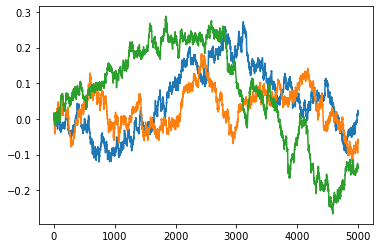

In [22]:
Mg_pos = np.array([[float(y) for y in re.findall(r'-?\d+\.\d+', x)] for x in lines[2::142]])

plt.plot(Mg_pos[:, 0])
plt.plot(Mg_pos[:, 1])
plt.plot(Mg_pos[:, 2])


In [68]:
masses = {"Mg" : 24.305, "H" : 1.00784, "C" : 12.0107, "N" : 14.0067, "O" : 15.999}

n_frames = len(lines)/ 142
assert(int(n_frames) == n_frames)

COMs = [] 

for i in range(int(n_frames)):
    frame_lines = lines[2+(i*142):142+(i*142)]
    
    symbols = [re.findall(r'[A-Za-z]+', x)[0] for x in frame_lines]
    
    mass = np.array([masses[x] for x in symbols])
    
    coords = np.array([[float(y) for y in re.findall(r'-?\d+\.\d+', x)] for x in frame_lines])
    
    COM = 1/sum(mass) * np.sum(np.array([mass, mass, mass]).transpose() * coords, axis=0)
    
    COMs.append(COM)
    
COMs = np.array(COMs)

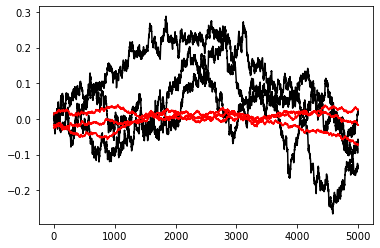

In [71]:
plt.plot(Mg_pos[:, 0], color='black')
plt.plot(Mg_pos[:, 1], color='black')
plt.plot(Mg_pos[:, 2], color='black')

plt.plot(COMs[:, 0] - np.mean(COMs[:, 0]), color='red')
plt.plot(COMs[:, 1] - np.mean(COMs[:, 1]), color='red')
plt.plot(COMs[:, 2] - np.mean(COMs[:, 2]), color='red')


In [91]:
movement = [np.linalg.norm(Mg_pos[i] - COMs[i]) for i in range(int(n_frames))]

In [92]:
movement_to_mean = movement - np.mean(movement)
autocorr = scipy.signal.correlate(movement_to_mean, movement_to_mean, mode='full', method='fft')

In [116]:
spectrum = scipy.fft.fft(autocorr)
spectrum_normal_domain = np.fft.fftfreq(len(autocorr), dt)

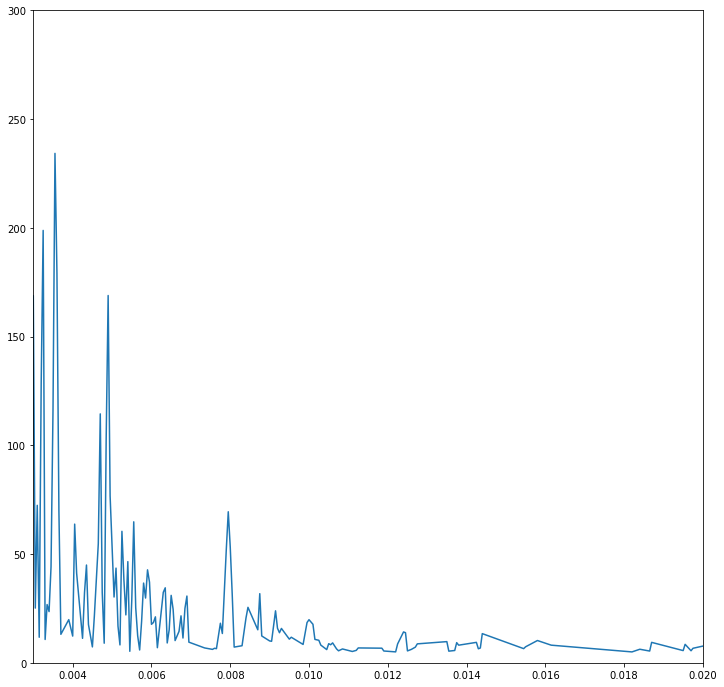

In [123]:
fig, ax = plt.subplots()

ax.set_xlim(3e-3, 2e-2)
ax.set_ylim(0, 300)

positive_freqs = np.where(spectrum_normal_domain > 0) 

contributions = np.where(abs(spectrum)[positive] > 5)[0]

limited_domain = spectrum_normal_domain[positive_freqs]
limited_spectrum = abs(spectrum)[positive_freqs]

plt.plot(limited_domain[contributions], limited_spectrum[contributions])

fig.set_size_inches(12, 12)

In [124]:
np.save("monomer_MD_frequencies", limited_domain)
np.save("monomer_MD_spectrum", limited_spectrum)